In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
from collections import defaultdict
%matplotlib inline

In [3]:
# Check if image is inverted before processing
# Read chosen image from directory
img = cv2.imread("../samples/image3.jpg")
img = (1-img) 
black_thresh = 50
white_tresh = 150
total_pixels = img.size

# If there are more images closer to the colour black, then the image is not inverted
if np.sum(img < black_thresh) > np.sum(img > white_tresh):
    print('Image is ok')

else:
    print('Image is inverted')
    # Work with good image type and then convert at the end 
    img = 1 - img 
    inverted = 1

# At the end if the input image was inverted, convert back 
if inverted == 1:
    print('Changing back to inverted original image')
    img4 = 1 - img
    inverted = 0



TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

[[[220 220 220]
  [219 219 219]
  [218 218 218]
  ...
  [190 190 190]
  [194 194 194]
  [239 239 239]]

 [[221 221 221]
  [221 221 221]
  [220 220 220]
  ...
  [189 189 189]
  [196 196 196]
  [234 234 234]]

 [[222 222 222]
  [221 221 221]
  [221 221 221]
  ...
  [189 189 189]
  [195 195 195]
  [219 219 219]]

 ...

 [[221 221 221]
  [221 221 221]
  [219 219 219]
  ...
  [250 250 250]
  [250 250 250]
  [249 249 249]]

 [[218 218 218]
  [219 219 219]
  [219 219 219]
  ...
  [250 250 250]
  [250 250 250]
  [249 249 249]]

 [[218 218 218]
  [221 221 221]
  [223 223 223]
  ...
  [251 251 251]
  [250 250 250]
  [250 250 250]]]


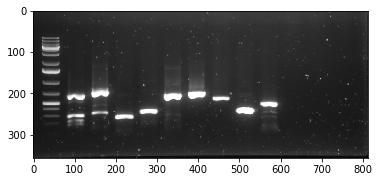

In [24]:
img = cv2.imread("../samples/image3.jpg")
# Convert to gray using OpenCV
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply gaussian blur to smooth image
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# Plot using matplotlib
plt.imshow(img, cmap='gray')

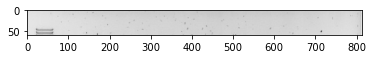

In [19]:
# Hard-coded crop to take holes in top of electrophoresis image
cropped_img = img[20:80,:]
cropped_img = cv2.GaussianBlur(cropped_img, (3, 3), 0)
plt.imshow(cropped_img, cmap='gray')

1


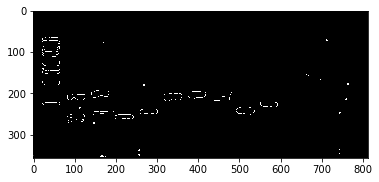

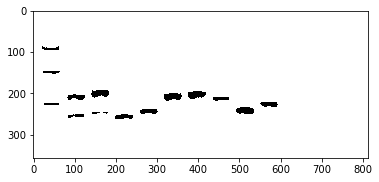

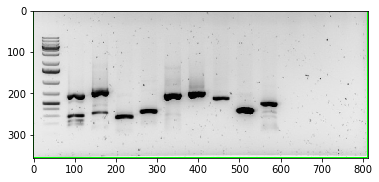

In [20]:
# Apply canny edge detector

edged = cv2.Canny(gray, 100, 200)
plt.figure()
plt.imshow(edged, cmap='gray')

# Apply thresholding, try messing around with other thresholding methods
ret, thresh = cv2.threshold(gray,90,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(thresh, cmap='gray')

# Find contours, different methods/parameters might give better results
contours, hierarchy = cv2.findContours(thresh,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))
# TODO: find area of contours and remove small ones to eliminate noise
# TODO: after finding big contour, use dilation / erosion to achieve good final contour
# TODO: find column using width of contour, multiple contours in same column should be labeled as ladder
# Draw contours on first image
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

plt.figure()
plt.imshow(img)

In [17]:
# Only run if you want to save contoured image to file
cv2.imwrite('../WIP_images/contoured_img.jpg', img)

True

## Some Additional tests

In [6]:
# Read chosen image from directory
img = cv2.imread("../samples/image3.jpg")
# Convert to gray using OpenCV
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply gaussian blur to smooth image
# gray = cv2.GaussianBlur(gray, (5, 5), 0)

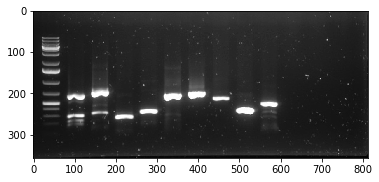

In [7]:
plt.imshow(gray,cmap='gray')

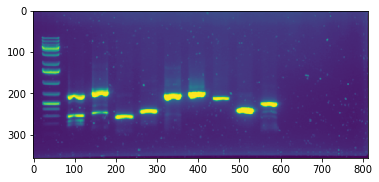

In [8]:
plt.imshow(cv2.GaussianBlur(gray, (5, 5), 0))

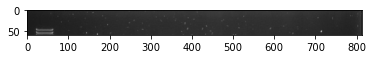

In [9]:
# Hard-coded crop to take holes in top of electrophoresis image
cropped_img = img[20:80,:]
cropped_img = cv2.GaussianBlur(cropped_img, (3, 3), 0)
plt.imshow(cropped_img, cmap='gray')

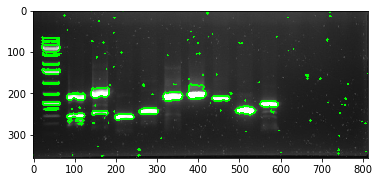

In [10]:
# # Apply canny edge detector
# edged = cv2.Canny(gray, 100, 200)
# plt.figure()
# plt.imshow(edged, cmap='gray')

# Apply thresholding, try messing around with other thresholding methods
ret, thresh = cv2.threshold(gray,90,255,cv2.THRESH_BINARY)
# plt.figure()
# plt.imshow(thresh, c map='gray')

# Find contours, different methods/parameters might give better results
contours, hierarchy = cv2.findContours(thresh,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#print(len(contours))
s_cnt = [cnt for cnt in contours if cv2.contourArea(cnt) > 200]
    
# TODO: find area of contours and remove small ones to eliminate noise
# TODO: after finding big contour, use dilation / erosion to achieve good final contour
# TODO: find column using width of contour, multiple contours in same column should be labeled as ladder
# Draw contours on first image
img2 = copy.copy(img)
cv2.drawContours(img2, contours, -1, (0, 255, 0), 3)

plt.figure()
plt.imshow(img2)




### Using morphology to get rid of noise in image

In [1]:
# TODO: Test how well this generalises to other pictures

kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Apply thresholding, try messing around with other thresholding methods
ret, thresh = cv2.threshold(cv2.cvtColor(opening, cv2.COLOR_BGR2GRAY),90,255,cv2.THRESH_BINARY)
# plt.figure()
# plt.imshow(thresh, c map='gray')

# Find contours, different methods/parameters might give better results
contours, hierarchy = cv2.findContours(thresh,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(opening, contours, -1, (0, 255, 0), 3)

plt.figure()
plt.imshow(opening)

NameError: name 'np' is not defined

[[198. 244.   0.]
 [ 82. 125.   1.]
 [141. 182.   2.]
 [258. 303.   3.]
 [491. 540.   4.]
 [ 23.  65.   5.]
 [551. 594.   6.]
 [435. 477.   7.]
 [ 82. 126.   8.]
 [316. 363.   9.]
 [140. 185.  10.]
 [374. 420.  11.]
 [ 22.  65.  12.]
 [ 21.  65.  13.]]
max edges defaultdict(<class 'int'>, {0: 65.0, 1: 126.0, 2: 182.0, 3: 198.0, 4: 258.0, 5: 316.0, 6: 374.0, 7: 435.0, 8: 491.0, 9: 551.0})
min edges defaultdict(<class 'int'>, {0: 21.0, 1: 82.0, 2: 141.0, 3: 244.0, 4: 303.0, 5: 363.0, 6: 420.0, 7: 477.0, 8: 540.0, 9: 594.0})


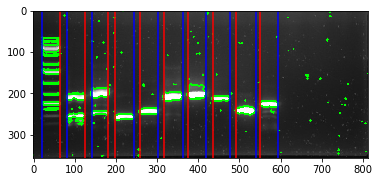

In [12]:
# create a 2D array to store the x, y co-orodinates of each contour
contours = s_cnt
#xposmin = np.zeros([len(contours), 2])
#xposmax = np.zeros([len(contours), 2])
tot = np.zeros([len(contours), 3])

# extract the first x,y co-ordinates of each contour
for k in range(0, len(contours)):
    tot[k] = ([ min(contours[k][:,0,0]), max(contours[k][:,0,0]), k])

print(tot)

# sort the max. x,y co-ordinates of each contour in ascending order whilst linking the contour number
ind3 = np.argsort(tot, axis=0)
tot_sorted = tot[ind3[:,0],:]

col = 0
boundary_right = defaultdict(int)
boundary_left = defaultdict(int)
alledges = defaultdict(int)
edge_right= tot_sorted[0,1] 
edge_left = tot_sorted[0,0] 
maxedge = tot_sorted[0,1] 
minedge = tot_sorted[0,0] 

# Find the positions of the different lanes
for x in range(0, len(tot_sorted)-1):
    
    if  tot_sorted[x,1] <= tot_sorted[x+1,0]:
        boundary_right[col] = maxedge
        boundary_left[col] = minedge
        maxedge = tot_sorted[x+1,0]
        minedge = tot_sorted[x+1,1]
        col = col + 1 
        if x == len(tot_sorted)-2:
            boundary_right[col] = maxedge
            boundary_left[col] = minedge
    else:
        maxedge = max(maxedge, tot_sorted[x+1,1])
        minedge = min(minedge, tot_sorted[x+1,0])

print('max edges',boundary_right)
print('min edges',boundary_left)

implot = plt.imshow(img2)

for v in range(0,col+1):
    plt.axvline(boundary_left[v], 0,color='b')
    plt.axvline(boundary_right[v], 0,color='r')
     
